
### Download the YOLOv5 model

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from addict import Dict 
from IPython.display import Markdown, display

if not Path("./yolov5/").exists():
    command_download = f'{"git clone https://github.com/ultralytics/yolov5.git -b v6.1"}'
    command_download = " ".join(command_download.split())
    print("Download Ultralytics Yolov5 project source:")
    display(Markdown(f"`{command_download}`"))
    download_res = %sx $command_download
else:
    print("Ultralytics Yolov5 repo already exists.")

Download Ultralytics Yolov5 project source:


`git clone https://github.com/ultralytics/yolov5.git -b v6.1`


1. Convert Pytorch model to ONNX
    
2. Convert ONNX to OpenVINO
    
    Call the OpenVINO Model Optimizer tool to convert the ONNX model to OpenVINO IR, with FP32 precision.

In [2]:
print("Convert PyTorch model to ONNX Model:")
command_export = f'{"cd yolov5 && python export.py --weights yolov5m/yolov5m.pt --imgsz 640 --batch-size 1 --include onnx "}'
display(Markdown(f"`{command_export}`"))
! $command_export

print("Convert ONNX model to OpenVINO IR:")
onnx_path = "./yolov5/yolov5m/yolov5m.onnx"
IMAGE_HEIGHT = 640
IMAGE_WIDTH = 640
model_output_path = "./yolov5/yolov5m/yolov5m_openvino_model/"

# Construct the command for Model Optimizer.
command_mo = f"""mo
                 --input_model "{onnx_path}"
                 --input_shape "[1, 3, {IMAGE_HEIGHT}, {IMAGE_WIDTH}]"
                 --data_type FP32
                 --output_dir "{model_output_path}"
                 """
command_mo = " ".join(command_mo.split())
display(Markdown(f"`{command_mo}`"))
! $command_mo

Convert PyTorch model to ONNX Model:


`cd yolov5 && python export.py --weights yolov5m/yolov5m.pt --imgsz 640 --batch-size 1 --include onnx `


Convert ONNX model to OpenVINO IR:


export: data=data\coco128.yaml, weights=['yolov5m/yolov5m.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5  v6.1-0-g3752807 torch 1.8.1+cpu CPU


  0%|          | 0.00/40.8M [00:00<?, ?B/s]
  0%|          | 112k/40.8M [00:00<00:43, 981kB/s]
  1%|1         | 496k/40.8M [00:00<00:18, 2.32MB/s]
  3%|2         | 1.19M/40.8M [00:00<00:12, 3.31MB/s]
  4%|3         | 1.49M/40.8M [00:00<00:13, 3.03MB/s]
  4%|4         | 1.77M/40.8M [00:00<00:17, 2.37MB/s]
  5%|5         | 2.22M/40.8M [00:00<00:16, 2.48MB/s]
  6%|6         | 2.48M/40.8M [00:01<00:20, 1.93MB/s]
  8%|7         | 3.16M/40.8M [00:01<00:13, 2.96MB/s]
  9%|8         | 3.52M/40.8M [00:01<00:14, 2.65MB/s]
  9%|9         | 3.82M/40.8M [00:01<00:14, 2.75MB/s]
 10%|#         | 4.12M/40.8M

`mo --input_model "./yolov5/yolov5m/yolov5m.onnx" --input_shape "[1, 3, 640, 640]" --data_type FP32 --output_dir "./yolov5/yolov5m/yolov5m_openvino_model/"`

 45%|####5     | 18.4M/40.8M [00:07<00:09, 2.43MB/s]
 46%|####5     | 18.7M/40.8M [00:07<00:09, 2.43MB/s]
 46%|####6     | 18.9M/40.8M [00:08<00:09, 2.42MB/s]
 47%|####6     | 19.1M/40.8M [00:08<00:09, 2.43MB/s]
 47%|####7     | 19.4M/40.8M [00:08<00:09, 2.43MB/s]
 48%|####8     | 19.6M/40.8M [00:08<00:09, 2.43MB/s]
 49%|####8     | 19.8M/40.8M [00:08<00:09, 2.43MB/s]
 49%|####9     | 20.1M/40.8M [00:08<00:08, 2.43MB/s]
 50%|####9     | 20.3M/40.8M [00:08<00:08, 2.43MB/s]
 50%|#####     | 20.5M/40.8M [00:08<00:08, 2.42MB/s]
 51%|#####     | 20.8M/40.8M [00:08<00:08, 2.43MB/s]
 51%|#####1    | 21.0M/40.8M [00:08<00:08, 2.43MB/s]
 52%|#####2    | 21.2M/40.8M [00:09<00:08, 2.43MB/s]
 53%|#####2    | 21.5M/40.8M [00:09<00:08, 2.43MB/s]
 53%|#####3    | 21.7M/40.8M [00:09<00:08, 2.42MB/s]
 54%|#####3    | 21.9M/40.8M [00:09<00:08, 2.43MB/s]
 54%|#####4    | 22.2M/40.8M [00:09<00:08, 2.43MB/s]
 55%|#####4    | 22.4M/40.8M [00:09<00:07, 2.43MB/s]
 55%|#####5    | 22.6M/40.8M [00:09<00:07, 2.4

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	C:\Users\jakar\openvino_notebooks\notebooks\220-yolov5-accuracy-check-and-quantization\./yolov5/yolov5m/yolov5m.onnx
	- Path for generated IR: 	C:\Users\jakar\openvino_notebooks\notebooks\220-yolov5-accuracy-check-and-quantization\./yolov5/yolov5m/yolov5m_openvino_model/
	- IR output name: 	yolov5m
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1, 3, 640, 640]
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the transformations config fi

### Imports

In [3]:
sys.path.append("./yolov5")

from yolov5.utils.datasets import create_dataloader
from yolov5.utils.general import check_dataset, non_max_suppression, scale_coords, xywh2xyxy, check_yaml,increment_path
from yolov5.utils.metrics import ap_per_class
from yolov5.val import process_batch

from openvino.tools.pot.api import Metric, DataLoader
from openvino.tools.pot.engines.ie_engine import IEEngine
from openvino.tools.pot.graph import load_model, save_model
from openvino.tools.pot.graph.model_utils import compress_model_weights
from openvino.tools.pot.pipeline.initializer import create_pipeline
from openvino.tools.pot.utils.logger import init_logger, get_logger

## Model Quantization with POT
### Create YOLOv5 DataLoader class

Create a class for the loading YOLOv5 dataset and annotation which inherits from POT API class DataLoader. The Ultralytics YOLOv5 training process requires image data normalization from [0,225] 8-bit integer range to [0.0,1.0] 32-bit floating point range.

In [4]:
class YOLOv5DataLoader(DataLoader):
    """ Inherit from DataLoader function and implement for YOLOv5.
    """

    def __init__(self, config):
        if not isinstance(config, Dict):
            config = Dict(config)
        super().__init__(config)

        self._data_source = config.data_source
        self._imgsz = config.imgsz
        self._batch_size = 1
        self._stride = 32
        self._single_cls = config.single_cls
        self._pad = 0.5
        self._rect = False
        self._workers = 1
        self._data_loader = self._init_dataloader()
        self._data_iter = iter(self._data_loader)

    def __len__(self):
        return len(self._data_loader.dataset)

    def _init_dataloader(self):
        dataloader = create_dataloader(self._data_source['val'], imgsz=self._imgsz, batch_size=self._batch_size, stride=self._stride,
                                       single_cls=self._single_cls, pad=self._pad, rect=self._rect, workers=self._workers)[0]
        return dataloader

    def __getitem__(self, item):
        try:
            batch_data = next(self._data_iter)
        except StopIteration:
            self._data_iter = iter(self._data_loader)
            batch_data = next(self._data_iter)

        im, target, path, shape = batch_data

        im = im.float()  
        im /= 255  
        nb, _, height, width = im.shape  
        img = im.cpu().detach().numpy()
        target = target.cpu().detach().numpy()

        annotation = dict()
        annotation['image_path'] = path
        annotation['target'] = target
        annotation['batch_size'] = nb
        annotation['shape'] = shape
        annotation['width'] = width
        annotation['height'] = height
        annotation['img'] = img

        return (item, annotation), img

### Create YOLOv5 Metric Class

Create a class to measure the model performance by Mean Average Precision (mAP) with the COCO dataset predicted result and annotation value, after applying Ultralytics NMS routine (`yolov5.utils.general.non_max_suppression`). Here we use both AP\@0.5 and AP\@0.5:0.95 as the measurement standard. This class should be inherited from the POT API Metric class.

The COCOMetric.update() function contains post-processing with Non-Max Suppression to sort boxes by score and select the box with the highest score.

In [5]:
class COCOMetric(Metric):
    """ Inherit from DataLoader function and implement for YOLOv5.
    """

    def __init__(self, config):
        super().__init__()
        self._metric_dict = {"AP@0.5": [], "AP@0.5:0.95": []}
        self._names = (*self._metric_dict,)
        self._stats = []
        self._last_stats = []
        self._conf_thres = config.conf_thres
        self._iou_thres = config.iou_thres
        self._single_cls = config.single_cls
        self._nc = config.nc
        self._class_names = {idx:name for idx,name in enumerate(config.names)}
        self._device = config.device

    @property
    def value(self):
        """ Returns metric value for the last model output.
        Both use AP@0.5 and AP@0.5:0.95
        """
        mp, mr, map50, map = self._process_stats(self._last_stats)

        return {self._names[0]: [map50], self._names[1]: [map]}

    @property
    def avg_value(self):
        """ Returns metric value for all model outputs.
        Both use AP@0.5 and AP@0.5:0.95
        """
        mp, mr, map50, map = self._process_stats(self._stats)

        return {self._names[0]: map50, self._names[1]: map}

    def _process_stats(self, stats):
        mp, mr, map50, map = 0.0, 0.0, 0.0, 0.0
        stats = [np.concatenate(x, 0) for x in zip(*stats)]  
        if len(stats) and stats[0].any():
            tp, fp, p, r, f1, ap, ap_class = ap_per_class(*stats, plot=False, save_dir=None, names=self._class_names)
            ap50, ap = ap[:, 0], ap.mean(1) 
            mp, mr, map50, map = p.mean(), r.mean(), ap50.mean(), ap.mean()
            np.bincount(stats[3].astype(np.int64), minlength=self._nc)  
        else:
            torch.zeros(1)

        return mp, mr, map50, map

    def update(self, output, target):
        """ Calculates and updates metric value
        Contains postprocessing part from Ultralytics YOLOv5 project
        :param output: model output
        :param target: annotations
        """

        annotation = target[0]["target"]
        width = target[0]["width"]
        height = target[0]["height"]
        shapes = target[0]["shape"]
        paths = target[0]["image_path"]
        im = target[0]["img"]

        iouv = torch.linspace(0.5, 0.95, 10).to(self._device)  # iou vector for mAP@0.5:0.95
        niou = iouv.numel()
        seen = 0
        stats = []
        # NMS
        annotation = torch.Tensor(annotation)
        annotation[:, 2:] *= torch.Tensor([width, height, width, height]).to(self._device)  # to pixels
        lb = []
        out = output[0]
        out = torch.Tensor(out).to(self._device)
        out = non_max_suppression(out, self._conf_thres, self._iou_thres, labels=lb,
                                  multi_label=True, agnostic=self._single_cls)
        # Metrics
        for si, pred in enumerate(out):
            labels = annotation[annotation[:, 0] == si, 1:]
            nl = len(labels)
            tcls = labels[:, 0].tolist() if nl else []  # target class
            _, shape = Path(paths[si]), shapes[si][0]
            seen += 1

            if len(pred) == 0:
                if nl:
                    stats.append((torch.zeros(0, niou, dtype=torch.bool), torch.Tensor(), torch.Tensor(), tcls))
                continue

            # Predictions
            if self._single_cls:
                pred[:, 5] = 0
            predn = pred.clone()
            scale_coords(im[si].shape[1:], predn[:, :4], shape, shapes[si][1])  # native-space pred

            # Evaluate
            if nl:
                tbox = xywh2xyxy(labels[:, 1:5])  # target boxes
                scale_coords(im[si].shape[1:], tbox, shape, shapes[si][1])  # native-space labels
                labelsn = torch.cat((labels[:, 0:1], tbox), 1)  # native-space labels
                correct = process_batch(predn, labelsn, iouv)
            else:
                correct = torch.zeros(pred.shape[0], niou, dtype=torch.bool)
            stats.append((correct.cpu(), pred[:, 4].cpu(), pred[:, 5].cpu(), tcls))
            self._stats.append((correct.cpu(), pred[:, 4].cpu(), pred[:, 5].cpu(), tcls))
        self._last_stats = stats

    def reset(self):
        """ Resets metric """
        self._metric_dict = {"AP@0.5": [], "AP@0.5:0.95": []}
        self._last_stats = []
        self._stats = []

    def get_attributes(self):
        """
        Returns a dictionary of metric attributes {metric_name: {attribute_name: value}}.
        Required attributes: 'direction': 'higher-better' or 'higher-worse'
                                                 'type': metric type
        """
        return {self._names[0]: {'direction': 'higher-better',
                                 'type': 'AP@0.5'},
                self._names[1]: {'direction': 'higher-better',
                                 'type': 'AP@0.5:0.95'}}

### Set POT Configuration

Create a function to set the configuration of the model, engine, dataset, metric and algorithms, which are used by the POT quantization pipeline API.

Here we use "DefaultQuantization" method for best performance of the quantization step. Alternatively, the "AccuracyAware" method can be used to keep accuracy loss below a predefined threshold, at the cost of performance during the quantization process (it takes longer to quantize the model). This is useful when DefaultQuantization results in more accuracy loss than desired.

In [6]:
def get_config():
    """ Set the configuration of the model, engine, 
    dataset, metric and quantization algorithm.
    """
    config = dict()
    data_yaml = check_yaml("./yolov5/data/coco128.yaml")
    data = check_dataset(data_yaml)

    model_config = Dict({
        "model_name": "yolov5m",
        "model": "./yolov5/yolov5m/yolov5m_openvino_model/yolov5m.xml",
        "weights": "./yolov5/yolov5m/yolov5m_openvino_model/yolov5m.bin"
    })

    engine_config = Dict({
        "device": "CPU",
        "stat_requests_number": 8,
        "eval_requests_number": 8
    })

    dataset_config = Dict({
        "data_source": data,
        "imgsz": 640,
        "single_cls": True,
    })

    metric_config = Dict({
        "conf_thres": 0.001,
        "iou_thres": 0.65,
        "single_cls": True,
        "nc": 1 ,  # if opt.single_cls else int(data['nc']),
        "names": data["names"],
        "device": "cpu"
    })

    algorithms = [
        {
            "name": "DefaultQuantization",  # or AccuracyAware
            "params": {
                    "target_device": "CPU",
                    "preset": "mixed",
                    "stat_subset_size": 300
            }
        }
    ]

    config["model"] = model_config
    config["engine"] = engine_config
    config["dataset"] = dataset_config
    config["metric"] = metric_config
    config["algorithms"] = algorithms
    
    return config

### Run Quantization Pipeline and Accuracy Verification

The following 9 steps show how to quantize the model using the POT API. The optimized model and collected min-max values will be saved. 

It will take few minutes for generating FP32-INT8 model, please check the quantized model is successfully saved and you get the metric results of INT8 model before running on next cell.

In [7]:
""" Download dataset and set config
"""
print("Run the POT. This will take few minutes...")
config = get_config()  
init_logger(level='INFO')
logger = get_logger(__name__)
save_dir = increment_path(Path("./yolov5/yolov5m/yolov5m_openvino_model/"), exist_ok=True)  # increment run
save_dir.mkdir(parents=True, exist_ok=True)  # make dir

# Step 1: Load the model.
model = load_model(config["model"])

# Step 2: Initialize the data loader.
data_loader = YOLOv5DataLoader(config["dataset"])

# Step 3 (Optional. Required for AccuracyAwareQuantization): Initialize the metric.
metric = COCOMetric(config["metric"])

# Step 4: Initialize the engine for metric calculation and statistics collection.
engine = IEEngine(config=config["engine"], data_loader=data_loader, metric=metric)

# Step 5: Create a pipeline of compression algorithms.
pipeline = create_pipeline(config["algorithms"], engine)

metric_results = None

# Check the FP32 model accuracy.
metric_results_fp32 = pipeline.evaluate(model)

logger.info("FP32 model metric_results: {}".format(metric_results_fp32))

# Step 6: Execute the pipeline to calculate Min-Max value
compressed_model = pipeline.run(model)

# Step 7 (Optional):  Compress model weights to quantized precision
#                     in order to reduce the size of final .bin file.
compress_model_weights(compressed_model)

# Step 8: Save the compressed model to the desired path.
optimized_save_dir = Path(save_dir).joinpath("optimized")
save_model(compressed_model, Path(Path.cwd()).joinpath(optimized_save_dir), config["model"]["model_name"])

# Step 9 (Optional): Evaluate the compressed model. Print the results.
metric_results_i8 = pipeline.evaluate(compressed_model)

logger.info("Save quantized model in {}".format(optimized_save_dir))
logger.info("Quantized INT8 model metric_results: {}".format(metric_results_i8))

Run the POT. This will take few minutes...


  0%|          | 0.00/6.66M [00:00<?, ?B/s]

Scanning 'C:\Users\jakar\openvino_notebooks\notebooks\220-yolov5-accuracy-check-and-quantization\datasets\coco128\label


INFO:openvino.tools.pot.pipeline.pipeline:Evaluation of generated model
INFO:openvino.tools.pot.engines.ie_engine:Start inference of 128 images
INFO:openvino.tools.pot.engines.ie_engine:13/128 batches are processed in 1.70s
INFO:openvino.tools.pot.engines.ie_engine:26/128 batches are processed in 2.75s
INFO:openvino.tools.pot.engines.ie_engine:39/128 batches are processed in 4.05s
INFO:openvino.tools.pot.engines.ie_engine:52/128 batches are processed in 5.25s
INFO:openvino.tools.pot.engines.ie_engine:65/128 batches are processed in 6.68s
INFO:openvino.tools.pot.engines.ie_engine:78/128 batches are processed in 7.85s
INFO:openvino.tools.pot.engines.ie_engine:91/128 batches are processed in 9.34s
INFO:openvino.tools.pot.engines.ie_engine:104/128 batches are processed in 10.66s
INFO:openvino.tools.pot.engines.ie_engine:117/128 batches are processed in 11.89s
INFO:openvino.tools.pot.engines.ie_engine:Inference finished
INFO:__main__:FP32 model metric_results: {'AP@0.5': 0.7628155287017375,

Compare Average Precision of quantized INT8 model with FP32 original model. 

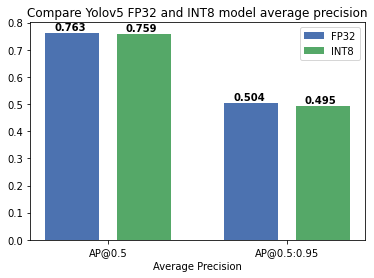

In [8]:
%matplotlib inline
plt.style.use('seaborn-deep')
fp32_acc = np.array(list(metric_results_fp32.values()))
int8_acc = np.array(list(metric_results_i8.values()))
x_data = ("AP@0.5","AP@0.5:0.95")
x_axis = np.arange(len(x_data))
fig = plt.figure()
fig.patch.set_facecolor('#FFFFFF')
fig.patch.set_alpha(0.7)
ax = fig.add_subplot(111)
plt.bar(x_axis - 0.2, fp32_acc, 0.3, label='FP32')
for i in range(0, len(x_axis)):
    plt.text(i - 0.3, round(fp32_acc[i],3) + 0.01, str(round(fp32_acc[i],3)),fontweight="bold")
plt.bar(x_axis + 0.2, int8_acc, 0.3, label='INT8')
for i in range(0, len(x_axis)):
    plt.text(i + 0.1, round(int8_acc[i],3) + 0.01, str(round(int8_acc[i],3)),fontweight="bold")
plt.xticks(x_axis, x_data)
plt.xlabel("Average Precision")
plt.title("Compare Yolov5 FP32 and INT8 model average precision")

plt.legend()
plt.show()

## Inference Demo Performance Comparison

This part shows how to use the Ultralytics model detection code ["detect.py"](https://github.com/ultralytics/yolov5/blob/master/detect.py) to run synchronous inference using the OpenVINO Python API on 2 images.

In [9]:
command_detect = f'{"cd yolov5 && python detect.py --weights ./yolov5m/yolov5m_openvino_model/optimized/yolov5m.xml "}'
display(Markdown(f"`{command_detect}`"))
%sx $command_detect

`cd yolov5 && python detect.py --weights ./yolov5m/yolov5m_openvino_model/optimized/yolov5m.xml `

["\x1b\x1bdetect: \x1bweights=['./yolov5m/yolov5m_openvino_model/optimized/yolov5m.xml'], source=data\\images, data=data\\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False",
 'YOLOv5  v6.1-0-g3752807 torch 1.8.1+cpu CPU',
 '',
 'Loading yolov5m\\yolov5m_openvino_model\\optimized\\yolov5m.xml for OpenVINO inference...',
 'image 1/2 C:\\Users\\jakar\\openvino_notebooks\\notebooks\\220-yolov5-accuracy-check-and-quantization\\yolov5\\data\\images\\bus.jpg: 640x640 4 persons, 1 bus, Done. (0.131s)',
 'image 2/2 C:\\Users\\jakar\\openvino_notebooks\\notebooks\\220-yolov5-accuracy-check-and-quantization\\yolov5\\data\\images\\zidane.jpg: 640x640 3 persons, 2 ties, Done. (0.128

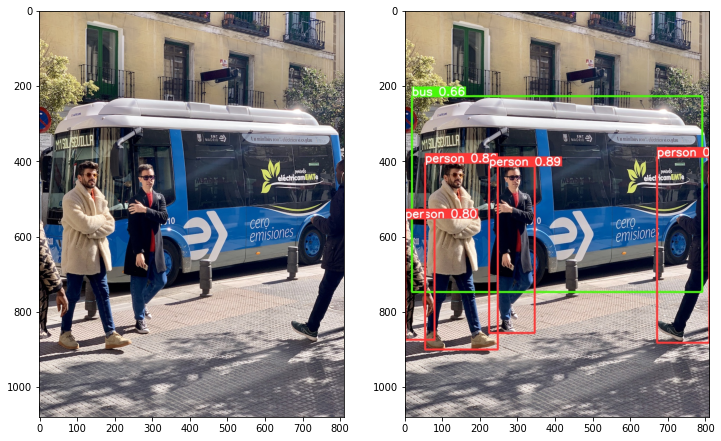

In [10]:
%matplotlib inline
import matplotlib.image as mpimg
fig2 = plt.figure(figsize=(12, 9))
fig2.patch.set_facecolor('#FFFFFF')
fig2.patch.set_alpha(0.7)
axarr1 = fig2.add_subplot(121)
axarr2 = fig2.add_subplot(122)
ori = mpimg.imread('./yolov5/data/images/bus.jpg')
result = mpimg.imread('./yolov5/runs/detect/exp/bus.jpg')
_ = axarr1.imshow(ori)
_ = axarr2.imshow(result)